# 03. Naver Movie Ranking

## 1. 네이버 영화 평점 사이트 분석
- https://movie.naver.com/
- 영화랭킹 탭이동
- 영화랭킹에서 평점순(현재사영영화) 선택

```
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20221227
```
- 웹 페이지 주소에는 많은 정보가 있다
- 원하는 정보를 얻기 위해서 변화시켜줘야 하는 주소의 규칙발견
- 여기에서는 날짜 정보를 변경해주면 해당 페이지 접근 가능

In [1]:
# requirements
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210914'
response = urlopen(url)
# response.status
soup = BeautifulSoup(response, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20210914" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화"

In [4]:
# 영화 제목태그
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=174830" title="가버나움">가버나움</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10249" title="모던 타임즈">모던 타임즈</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10341" title="위대한 독재자">위대한 독재자</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=19335" title="해피 투게더">해피 투게더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=173692" title="바울">바울</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=190324" title="프리 가이">프리 가이</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=200896" title="꽃다발 같은 사랑을 했다">꽃다발 같은 사랑을 했다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=182387" title="윤희에게">윤희에게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=91031" title="신세계">신세계</a>

In [5]:
soup.select('.tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=174830" title="가버나움">가버나움</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10249" title="모던 타임즈">모던 타임즈</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10341" title="위대한 독재자">위대한 독재자</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=19335" title="해피 투게더">해피 투게더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=173692" title="바울">바울</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=190324" title="프리 가이">프리 가이</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=200896" title="꽃다발 같은 사랑을 했다">꽃다발 같은 사랑을 했다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=182387" title="윤희에게">윤희에게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=91031" title="신세계">신세계</a>

In [8]:
# 1
soup.find_all('div','tit5')[0].a.string

'가버나움'

In [12]:
# 2
soup.select('.tit5')[0].find('a').text

'가버나움'

In [17]:
# 3
soup.select('.tit5')[0].select_one('a').get_text()

'가버나움'

In [ ]:
# 영화 평점 태그
soup.find_all('td','point')
# soup.select('.point')

In [23]:
len(soup.find_all('td','point')), len(soup.find_all('div','tit5'))

(47, 47)

In [28]:
soup.find_all('td',class_='point')[0].text, soup.select('td.point')[0].string

('9.59', '9.59')

In [ ]:
# 영화 제목 리스트
end = len(soup.find_all('div','tit5'))

movie_name = []

for n in range(0,end):
    movie_name.append(
        soup.find_all('div','tit5')[n].a.string
    )
movie_name

In [33]:
movie_name = [soup.select('.tit5')[n].a.text for n in range(0,end)]
movie_name

['가버나움',
 '코다',
 '모던 타임즈',
 '위대한 독재자',
 '해피 투게더',
 '바울',
 '프리 가이',
 '꽃다발 같은 사랑을 했다',
 '윤희에게',
 '신세계',
 '더 파더',
 '이별의 아침에 약속의 꽃을 장식하자',
 '중경삼림',
 '천로역정: 천국을 찾아서',
 '너의 이름은.',
 '부에나 비스타 소셜 클럽',
 '화양연화',
 '캡틴 판타스틱',
 '드림걸즈',
 '분노',
 '노매드랜드',
 '블랙 위도우',
 '아비정전',
 '너의 췌장을 먹고 싶어',
 '모가디슈',
 '메기',
 '우리의 20세기',
 '이스케이프 룸 2: 노 웨이 아웃',
 '릴리 슈슈의 모든 것',
 '하나와 앨리스',
 '너의 췌장을 먹고 싶어',
 '맨 인 더 다크 2 ',
 '날씨의 아이',
 '죄 많은 소녀',
 '소셜 네트워크',
 '그린 나이트',
 '독전',
 '기담',
 '호우시절',
 '인질',
 '더 수어사이드 스쿼드',
 '레미니센스',
 '싱크홀',
 '올드',
 '샹치와 텐 링즈의 전설',
 '쏘아올린 불꽃, 밑에서 볼까? 옆에서 볼까?',
 '귀문']

In [ ]:
# 영화평점 리스트
end = len(soup.find_all('td','point'))
movie_point = [soup.find_all('td','point')[n].string for n in range(0,end)]
movie_point

In [37]:
# 전체 데이터 수확인
len(movie_name), len(movie_point)

(47, 47)

## 2. 자동화를 위한 코드

```
'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210914'
```
- 날짜만 변경하면 원하는 기간만큼 데이터를 얻을 수 있다

In [38]:
date = pd.date_range('2021.01.01', periods=100, freq='D')
date

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [39]:
date[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [40]:
date[0].strftime('%Y-%m-%d')

'2021-01-01'

In [41]:
date[0].strftime('%Y.%m.%d')

'2021.01.01'

In [47]:
# 문자열 format

test_string = 'Hi, i am {name}'
test_string.format(name = 'zerobase')

'Hi, i am zerobase'

In [44]:
dir(test_string)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [54]:
import time
from tqdm import tqdm

movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}'
    response = urlopen(url.format(date = today.strftime('%Y%m%d')))
    soup = BeautifulSoup(response, 'html.parser')

    end = len(soup.find_all('td','point'))

    movie_date.extend([today for _ in range(0, end)])
    movie_name.extend([soup.select('div.tit5')[n].find('a').get_text() for n in range(0,end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, end)])

    time.sleep(0.5)

100%|██████████| 100/100 [02:21<00:00,  1.41s/it]


In [55]:
len(movie_date), len(movie_name), len(movie_point)

(4793, 4793, 4793)

In [60]:
movie_date[:5]

[Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-01 00:00:00', freq='D')]

In [57]:
movie_name[:5]

['가나의 혼인잔치: 언약', '언플랜드', '극장판 바이올렛 에버가든', '부활: 그 증거', '소년시절의 너']

In [62]:
movie = pd.DataFrame({
    'date' : movie_date,
    'name' : movie_name,
    'point' : movie_point
})
movie.tail()

,date,name,point
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91
4792,2021-04-10,너는 여기에 없었다,7.82


In [63]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 112.5+ KB


In [66]:
movie['point'] = movie['point'].astype(float)

In [67]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 112.5+ KB


In [68]:
# 데이터 저장

movie.to_csv('../data/03. naver_moive_data.csv',sep=',', encoding='utf-8')

In [70]:
df = pd.read_csv('../data/03. naver_moive_data.csv', index_col=0)
df

,date,name,point
0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,2021-01-01,언플랜드,9.52
2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,2021-01-01,부활: 그 증거,9.40
4,2021-01-01,소년시절의 너,9.39
...,...,...,...
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91


## 3. 영화 평점 데이터 정리

In [71]:
import numpy as np
import pandas as pd

In [72]:
movie = pd.read_csv('../data/03. naver_moive_data.csv', index_col=0)
movie.tail()

,date,name,point
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91
4792,2021-04-10,너는 여기에 없었다,7.82


- 영화 이름으로 인덱스 잡는다
- 점수의 합산을 구한다
- 100일간 네이버 영화 평점 합산 기준 베스트&워스트 10 선정

In [74]:
movie_unique = pd.pivot_table(data=movie, index='name', aggfunc=np.sum)
movie_unique

C:\Users\user\AppData\Local\Temp\ipykernel_28200\294455726.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  movie_unique = pd.pivot_table(data=movie, index='name', aggfunc=np.sum)


,point
name,
120BPM,2.76
1917,62.09
800,25.27
가나의 혼인잔치: 언약,501.68
건축학개론,78.03
...,...
해피 투게더,703.29
허트 로커,219.32
현기증,198.56


In [75]:
movie_best = movie_unique.sort_values(by = 'point', ascending= False)
movie_best.head()

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12


In [81]:
tmp = movie.query("name == ['화양연화']")
tmp

,date,name,point
22,2021-01-01,화양연화,8.80
70,2021-01-02,화양연화,8.79
117,2021-01-03,화양연화,8.75
162,2021-01-04,화양연화,8.76
205,2021-01-05,화양연화,8.76
...,...,...,...
4571,2021-04-06,화양연화,8.79
4621,2021-04-07,화양연화,8.79
4668,2021-04-08,화양연화,8.79
4719,2021-04-09,화양연화,8.79


In [79]:
# 시각화
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic')
%matplotlib inline

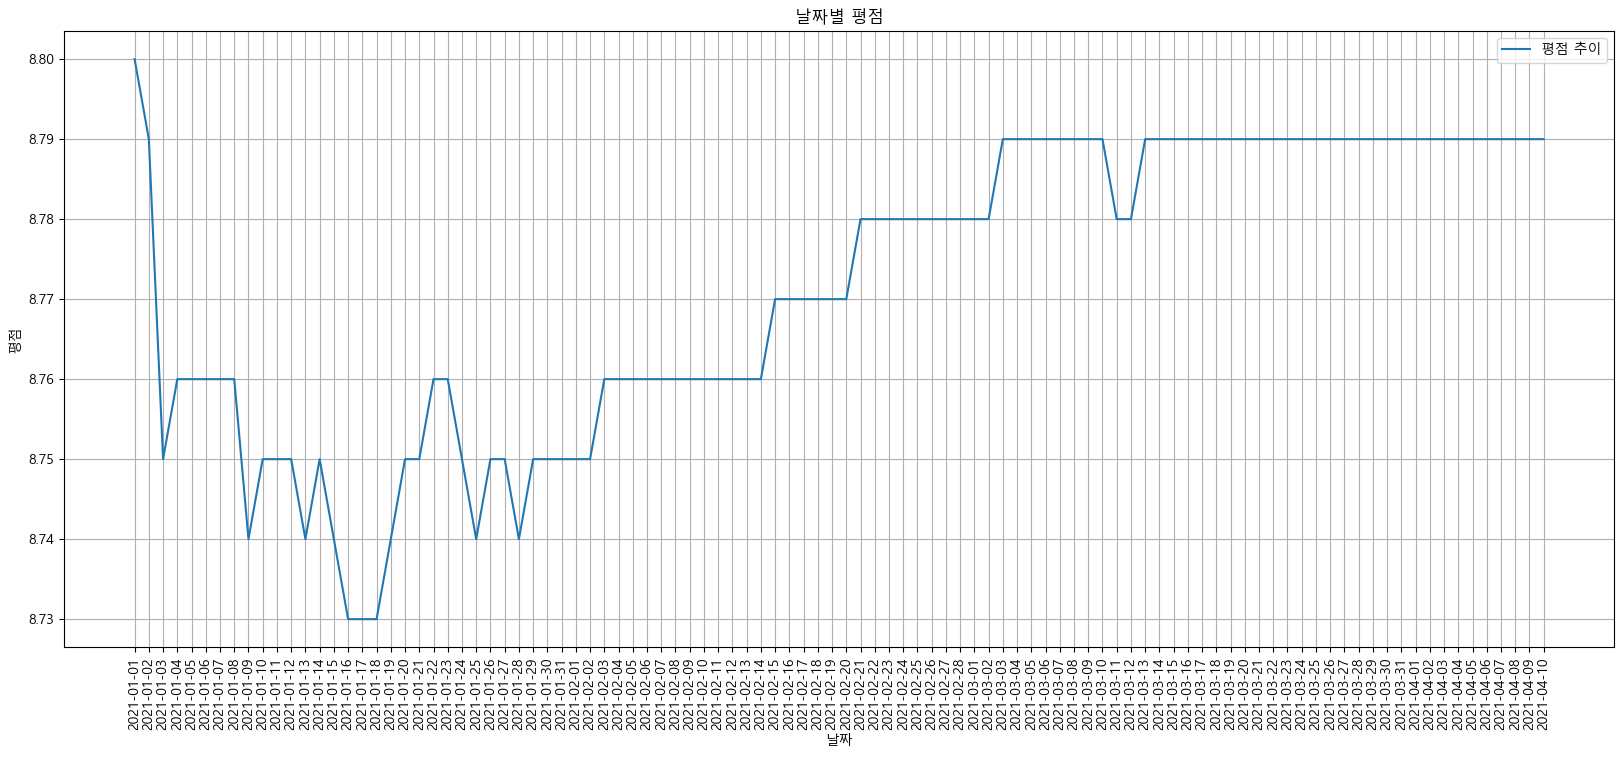

In [85]:
plt.figure(figsize=(20,8)) # x = 20 / y = 8
plt.plot(tmp['date'],tmp['point']) # 선그래프 : x축 날짜 / y축 평점 => 날짜에 따른 평점 변화를 선그래프로 표현(시계열)
plt.title('날짜별 평점')
plt.xlabel('날짜')
plt.ylabel('평점')
plt.xticks(rotation = 'vertical') # 날짜들을 세로로
plt.legend(labels=['평점 추이'],loc = 'best')
plt.grid(True)
plt.show()

In [86]:
# 상위 10개 영화
movie_best.head(10)

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12
타오르는 여인의 초상,833.51
너의 이름은.,817.40
아비정전,814.83
찬실이는 복도 많지,785.58


In [87]:
# 하위 10개 영화
movie_best.tail(10)

,point
name,
최악의 하루,23.40
열혈남아,23.16
영웅본색,18.36
너는 여기에 없었다,15.64
협상,14.64
고질라,13.34
초미의 관심사,7.37
레이니 데이 인 뉴욕,5.54
신 고질라,4.97


In [88]:
movie_pivot = pd.pivot_table(data=movie,index='date',columns='name',values='point')
movie_pivot.head()

name,120BPM,1917,800,가나의 혼인잔치: 언약,건축학개론,고질라,고질라 VS. 콩,국가부도의 날,굿바이,귀여운 여인,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,허트 로커,현기증,협상,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,3.60,9.59,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.80
2021-01-02,NaN,NaN,3.60,9.56,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.79
2021-01-03,NaN,NaN,3.60,9.54,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.75
2021-01-04,NaN,NaN,3.61,9.51,NaN,NaN,NaN,NaN,9.04,8.7,...,NaN,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.76
2021-01-05,NaN,NaN,3.62,9.52,NaN,NaN,NaN,NaN,9.04,NaN,...,NaN,NaN,NaN,NaN,8.88,NaN,NaN,NaN,NaN,8.76


In [89]:
movie_pivot.to_excel('../data/03. movie_pivot.xlsx')

In [90]:
# movie_pivot.columns = movie_pivot.columns.droplevel()

In [91]:
import platform
import seaborn
from matplotlib import font_manager, rc

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('unknown system')

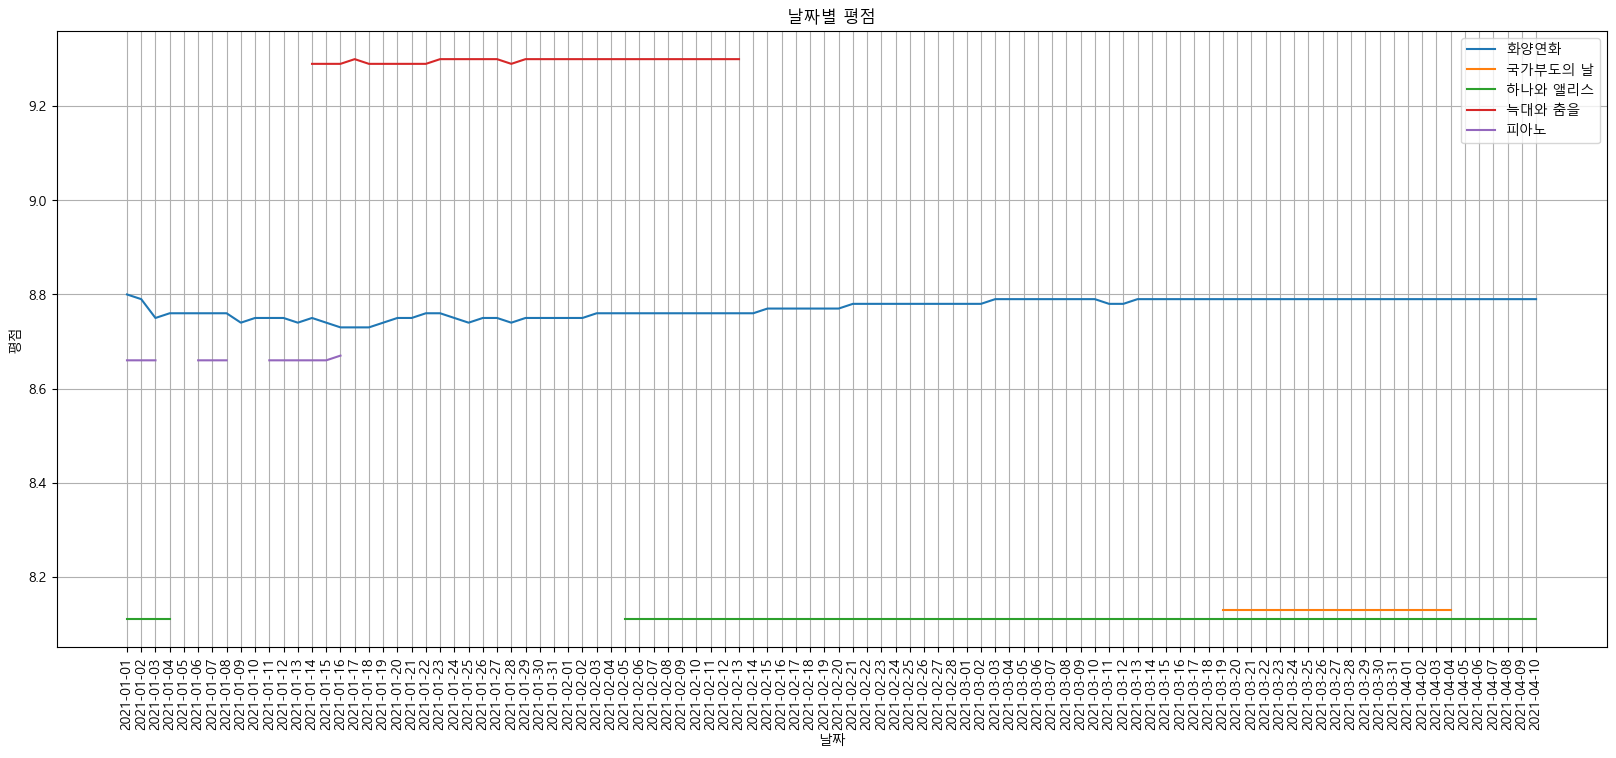

In [94]:
target_col = ['화양연화','국가부도의 날','하나와 앨리스', '늑대와 춤을','피아노']
plt.figure(figsize=(20,8))
plt.title('날짜별 평점')
plt.xlabel('날짜')
plt.ylabel('평점')
plt.xticks(rotation = 'vertical')
plt.tick_params(bottom = 'off', labelbottom='off') # x축 선추가
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid(True)
